# <center> **Series de tiempo**

Beneficios trimestrales (en dólares) por participación en Johnson & Johnson $1960$-$1980$. 

**Fuente** : Shumway, R. H. and Stoffer, D. S. (2000) Time Series Analysis and its Applications. Second Edition. Springer. 

In [ ]:
#!pip install mplcyberpunk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
sns.set()
#import mplcyberpunk
#plt.style.use("cyberpunk")

In [ ]:
data =  pd.read_csv("./JohnsonJohnson.csv")
data.head() 

,date,sales
0,01/01/1960,0.71
1,01/04/1960,0.63
2,01/07/1960,0.85
3,01/10/1960,0.44
4,01/01/1961,0.61


In [ ]:
data.date.describe()

count             84
unique            84
top       01/01/1960
freq               1
Name: date, dtype: object

In [ ]:
data['date'] = pd.to_datetime(data['date'], format="%d/%m/%Y")
data['sales'] = pd.to_numeric(data['sales'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    84 non-null     datetime64[ns]
 1   sales   84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [ ]:
data.head()

,date,sales
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-01,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [ ]:
data.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                      84
unique                     84
top       1960-01-01 00:00:00
freq                        1
first     1960-01-01 00:00:00
last      1980-10-01 00:00:00
Name: date, dtype: object

In [ ]:
data = data.set_index('date')
data.head()

,sales
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-01,0.85
1960-10-01,0.44
1961-01-01,0.61


# Frequency

| Símbolo | Descripción |
| -- | -- |
| B	 | business day frequency |
| D  |	calendar day frequency |
| W	 | weekly frequency |
| M  | month end frequency |
| BM |	business month end frequency |
| MS |	month start frequency |
| BMS|	business month start frequency |
| Q	 | quarter end frequency |
| BQ |	business quarter endfrequency |
| QS |	quarter start frequency |
| BQS|	business quarter start frequency |
| A	 | year end frequency |
| BA |	business year end frequency |
| AS |	year start frequency |
| BAS| business year start frequency |
| H	 | hourly frequency |
| T	 | minutely frequency |
| S	 | secondly frequency |
| L	 | milliseonds |
| U  |	microseconds |



**Fuente**: [pandas-docs_time series](
https://pandas.pydata.org/pandas-docs/version/0.9.1/timeseries.html)

In [ ]:
yt = data.asfreq(freq='QS')
yt

,sales
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-01,0.85
1960-10-01,0.44
1961-01-01,0.61
...,...
1979-10-01,9.99
1980-01-01,16.20
1980-04-01,14.67


# **Split data**

In [ ]:
def train_test_split(data, train_size=0.85):
  size = int(len(data)*train_size)
  # split data
  X_train = data.iloc[:size]
  X_test = data.iloc[size:]
  return X_train, X_test

In [ ]:
# split
X_train, X_test = train_test_split(yt, train_size=0.85)

In [ ]:
print('Train : ', len(X_train))
print('Test : ', len(X_test))
print('Total : ', len(yt))

Train :  71
Test :  13
Total :  84


# **Gráfico de la serie**

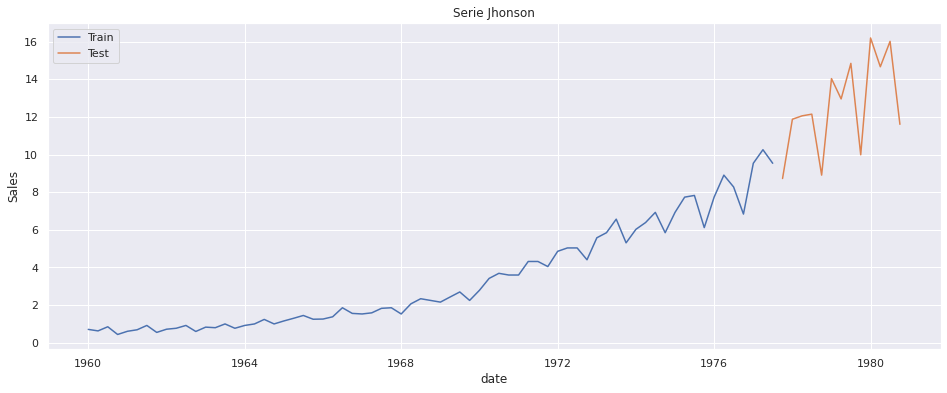

In [ ]:
# gráficamos serie de entrenamiento y serie de prueba
plt.figure(figsize=(16,6))
plt.plot(X_train, label='Train')
plt.plot(X_test, label = 'Test')
plt.title('Serie Jhonson')
plt.xlabel('date')
plt.ylabel('Sales')
plt.legend()
#mplcyberpunk.add_glow_effects()
plt.show()

Podemos observar que la serie no es estacionaria, es decir, su media no es cero, y su varianza no es constante, de hecho va en aumentando a medida que aumenta el tiempo. Si graficamos la función de autocorrelación muestral los rezagos tendrían que decaer de forma exponencial, característica que rebela la no estacionariedad de la serie.

In [ ]:
from statsmodels.graphics.tsaplots import quarter_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


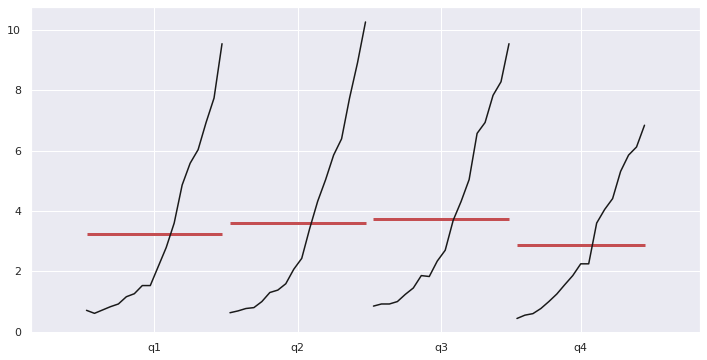

In [ ]:
fig = quarter_plot(X_train.sales);
fig.set_size_inches((12, 6))
plt.show()

En el gráfico anterior podemos apreciar que en el cuatrimestre dos $q2$ y tres $q3$, los beneficios son trimestrales, mostrando un ligero patrón estacional.

## ACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.tsa.stattools as sts  
from statsmodels.tsa.seasonal import seasonal_decompose

Graficamos la función de autocorrelación muestral con **plot_acf()**.

In [ ]:
yt.shift(1)

,sales
date,
1960-01-01,NaN
1960-04-01,0.71
1960-07-01,0.63
1960-10-01,0.85
1961-01-01,0.44
...,...
1979-10-01,14.85
1980-01-01,9.99
1980-04-01,16.20


In [ ]:
rk = [1, -0.62, 0.35]

In [ ]:
sum = []
#
n = 60#len(rk)
sum = []
serie = [1]
for i in range(1,len(rk)):
  value = 2*rk[i]**2
  serie.append(value)
  sum.append((np.sum(serie[:i]))**(0.5)*(n**(-0.5)))

print(sum)

[0.12909944487358058, 0.17169740825067806]


In [ ]:
# Función (presentación p27) para calcular la ACF
def own_acf(x, nlags=20):

  n =len(x)
  rk = [1]
  k = nlags + 1 
  for i in range(1,k):
    xt_n = x.iloc[:-i, 0]  
    xt_d = x.iloc[:, 0]
    xt_plus_k = x.shift(-i).iloc[:-i, 0]

    num_sum = np.sum((xt_n - xt_d.mean())*(xt_plus_k - xt_d.mean()))
    den_sum = np.sum((xt_d-xt_d.mean())**2)

    ri = num_sum/den_sum
    rk.append(ri)
    # confidence interval
    sum = []
  serie = [1]
  for i in range(1,len(rk)):
    value = 2*rk[i]**2
    serie.append(value)
    sum.append((np.sum(serie[:i]))**(0.5)*(n**(-0.5)))
  
  li = [x*2 for x in sum]
  ui = [-x*2 for x in sum]

  return rk, li, ui

In [ ]:
rk, li, ls = own_acf(X_train, nlags=20)

In [ ]:
from statsmodels.tsa.stattools import acf

In [ ]:
df_comparison = pd.DataFrame({'statsmodels_acf':acf(X_train,nlags=20), 'own_acf':rk})          
df_comparison.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


,statsmodels_acf,own_acf
0,1.000000,1.000000
1,0.928858,0.928858
2,0.860783,0.860783
3,0.823436,0.823436
4,0.815450,0.815450


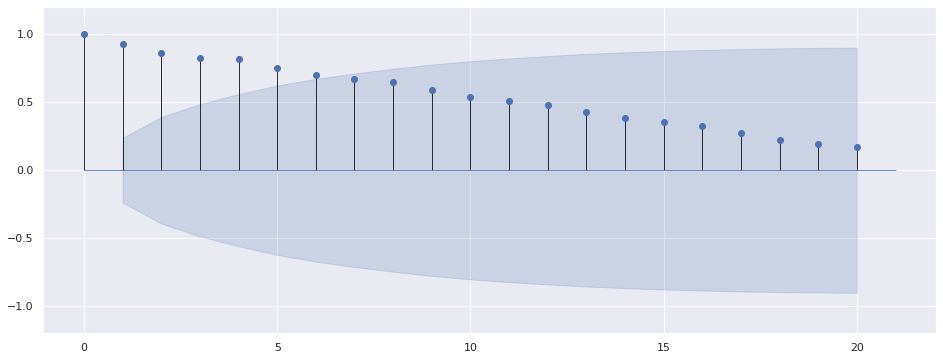

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(rk, 'o')
plt.vlines(x = np.arange(start=0, stop=len(rk), dtype='float'), ymin=0, ymax=rk, colors='black', linewidth=0.8)
plt.fill_between(np.arange(1,21,1), li, ls, color='b', alpha=.2)
plt.hlines(y=0, xmin=0, xmax=len(rk), linewidth=0.8, color='b')
plt.ylim(-1.2, 1.2)
plt.show()

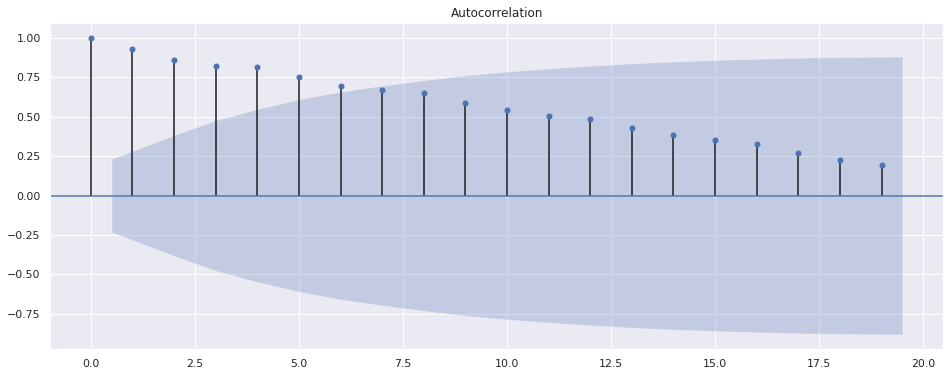

In [ ]:
fig = plot_acf(X_train.sales)
fig.set_size_inches((16, 6))
plt.show()

El decaimiento exponencial de los rezagos indica que la serie tiene tendencia, y por tanto, no es estacionaria. 

El siguiente gráfico puede ser útil para darnos una idea de la existencia de tendencia, parate estacional. En la parte superior observamos la serie original, el segundo gráfico nos muestra la tendencia de la serie original, el siguiente nos muestra la estacionalidad de la serie original, y finalmente el último nos muestra los residuales, que es el resultados de quitar la tendencia y la parte estacional a la serie original.

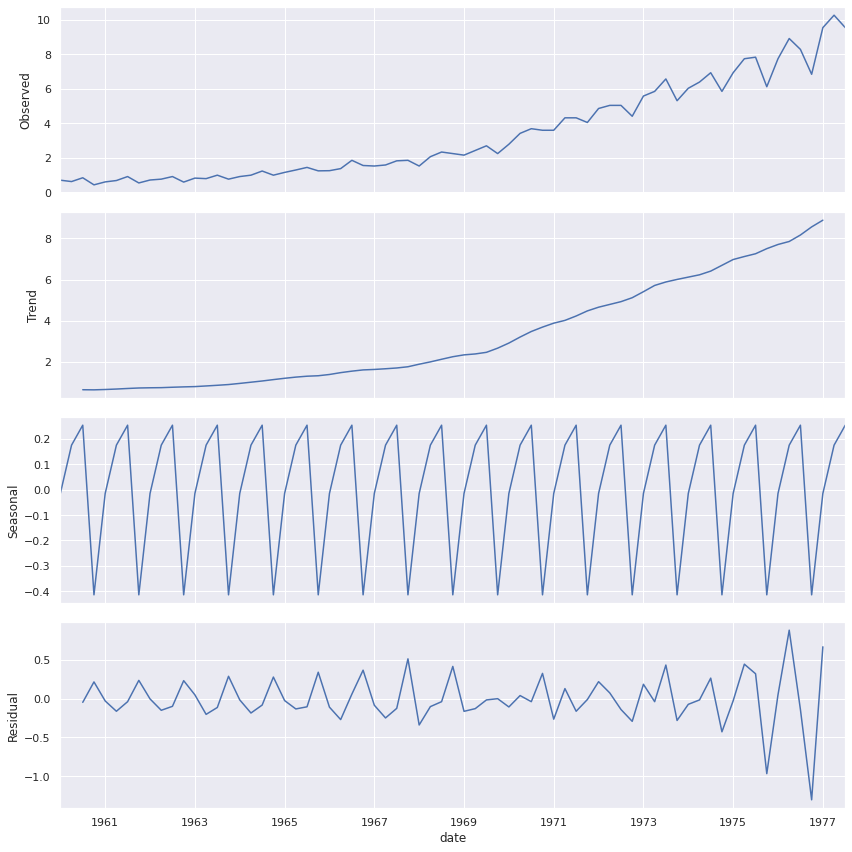

In [ ]:
dec = seasonal_decompose(X_train.sales, model="additive")

fig= dec.plot()
fig.set_size_inches((12, 12))
#mplcyberpunk.add_glow_effects()
plt.tight_layout()
plt.show()

# **Prueba de estacionariedad**

La hipótesis nula de la prueba de Dickey-Fuller aumentada es:

$H_0 : θ = 0$ (significa que la serie no es estacionaria)

$H_1 : \theta <  0$ (significa que la serie es estacionaria)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Augmented Dickey Fuller test
def adftest(data):
  result = adfuller(data, autolag='AIC')
  print(f'ADF Statistic: {result[0]}')
  print(f'p-value: {result[1]}')
  for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
  # result
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
  if result[0] < result[4]["5%"]:
    print ("Se rechaza Ho - La serie es estacionaria")
  else:
    print ("No se rechaza Ho - La serie no es estacionaria")

In [ ]:
adftest(X_train.sales)

ADF Statistic: 3.4817802171602636
p-value: 1.0
Critial Values:
   1%, -3.5335601309235605
Critial Values:
   5%, -2.9064436883991434
Critial Values:
   10%, -2.590723948576676
	1%: -3.534
	5%: -2.906
	10%: -2.591
No se rechaza Ho - La serie no es estacionaria


> Si la serie no es estacionaria probamos con una diferencia y después volvemos a realizar el test, en caso de no funcionar probamos con $2$ diferencias, y nuevamente aplicamos el test.

Observe que es necesario aplicar una transformación a la serie debido a que la varianza no es homogénea, en la serie original, a medida que avanza el tiempo la varianza aumenta. De entrada vamos a probar con la transformación logarítmica. 

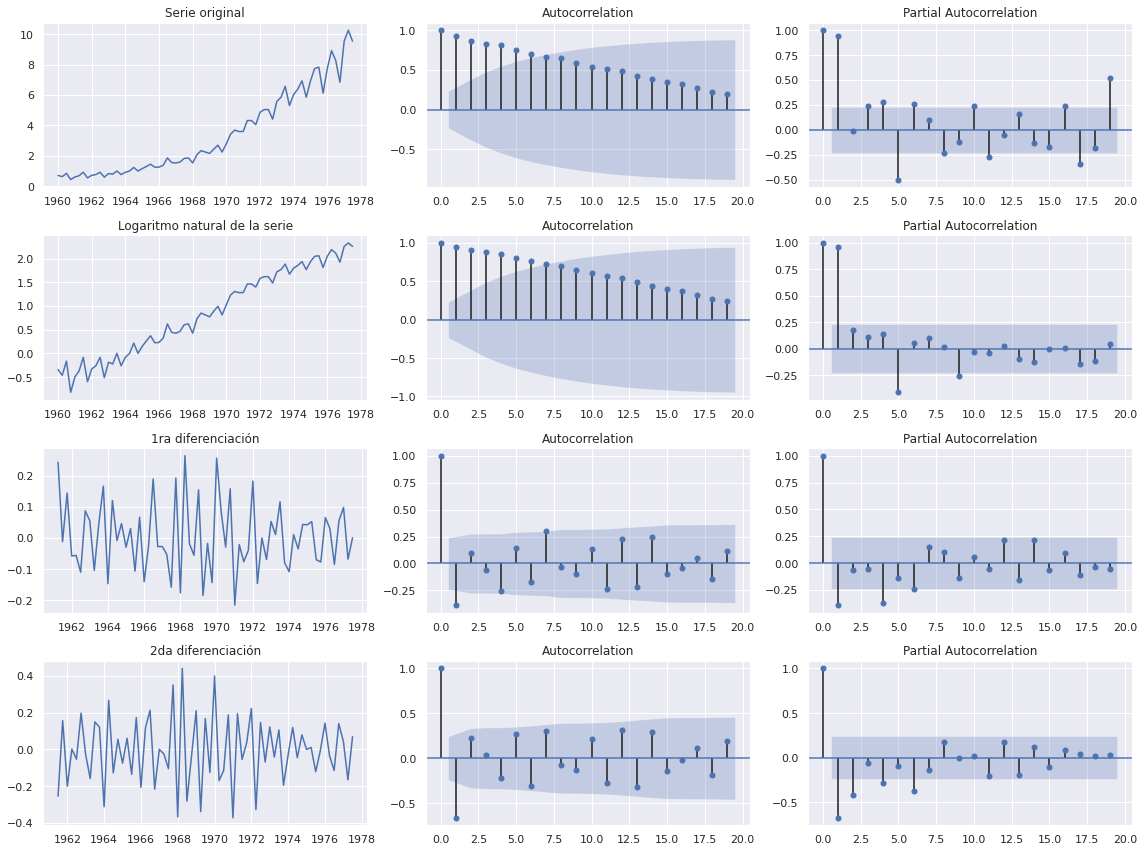

In [ ]:
# Serie Original
fig, axes = plt.subplots(4,3, sharex=False, figsize=(16, 12))
axes[0, 0].plot(X_train.sales); 
axes[0, 0].set_title('Serie original')
plot_acf(X_train.sales, ax=axes[0, 1]);
plot_pacf(X_train.sales, ax=axes[0, 2]);

# Logaritmo natural de la serie
axes[1, 0].plot(np.log(X_train.sales)); 
axes[1, 0].set_title('Logaritmo natural de la serie')
plot_acf(np.log(X_train.sales), ax=axes[1, 1]);
plot_pacf(np.log(X_train.sales), ax=axes[1, 2]);

# 1ra diferenciación
axes[2, 0].plot(np.log(X_train.sales).diff().diff(4)); 
axes[2, 0].set_title('1ra diferenciación')
plot_acf(np.log(X_train.sales).diff().diff(4).dropna(), ax=axes[2, 1]);
plot_pacf(np.log(X_train.sales).diff().diff(4).dropna(), ax=axes[2, 2]);

# 2da diferenciación
axes[3, 0].plot(np.log(X_train).diff().diff().diff(4)); 
axes[3, 0].set_title('2da diferenciación')
plot_acf(np.log(X_train.sales).diff().diff().diff(4).dropna(), ax=axes[3, 1]);
plot_pacf(np.log(X_train.sales).diff().diff().diff(4).dropna(), ax=axes[3, 2]);
plt.tight_layout()
plt.show()


Vamos a probar con la primera diferenciación, y en caso de no funcionar, probamos con la segunda diferenciación. Además aplicamos transformación logarítmica a la serie original, y después hacemos la diferenciación, y eliminamos el valor NA que se genere al diferenciar la serie.

In [ ]:
X_train_log_diff =  np.log(X_train).diff().diff(4).dropna()

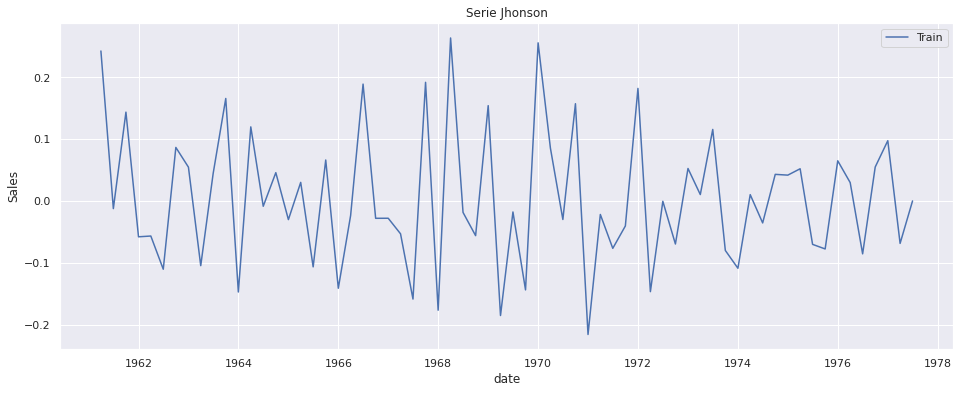

In [ ]:
# gráficamos serie con una diferencia
plt.figure(figsize=(16,6))
plt.plot(X_train_log_diff, label='Train')
plt.title('Serie Jhonson')
plt.xlabel('date')
plt.ylabel('Sales')
plt.legend()
#mplcyberpunk.add_glow_effects()
plt.show()

In [ ]:
adftest(X_train_log_diff.sales)

ADF Statistic: -6.082457671940422
p-value: 1.0839818085936324e-07
Critial Values:
   1%, -3.5443688564814813
Critial Values:
   5%, -2.9110731481481484
Critial Values:
   10%, -2.5931902777777776
	1%: -3.544
	5%: -2.911
	10%: -2.593
Se rechaza Ho - La serie es estacionaria


# **Estimación**

Una vez comprobada la estacionariedad de la serie e identificando el orden del modelo, procedemos a la estimación de los parámetros.

In [ ]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2

> *SARIMAX(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, ...)*

**Parámetros:**

- **endog** : El proceso de la serie temporal observada.
- **exog** : Conjunto de regresores exógenos.
- **order** : El orden $(p,d,q)$ del modelo para los componentes autorregresivos $(p)$, diferencias $(d)$ y el orden de media móvil $(q)$. $d$ es siempre un entero, mientras que $p$ y $q$ pueden ser enteros o listas de enteros.
- **seasonal_order** : El orden $(P,D,Q,s)$ del componente estacional del modelo para los parámetros **AR(P)**, las diferencias **I(D)**, los parámetros de media móvil **MA(Q)** y la periodicidad $(s)$. Por defecto es $(0, 0, 0, 0)$. $D$ y $s$ son siempre enteros, mientras que $P$ y $Q$ pueden ser enteros o listas de enteros positivos.
- **trend** : Parámetro que controla la tendencia determinista. Puede especificarse como una cadena en la que **c** indica un término constante, **t** indica una tendencia lineal en el tiempo, y **ct** incluye ambos.
- **enforce_stationarity** : Requerir o no que los parámetros autorregresivos correspondan a un proceso estacionario.
- **enforce_stationarity** :  Requerir o no que los parámetros de media móvil correspondan a un proceso invertible.


In [ ]:
model = SARIMAX(np.log(X_train), order=(0,1,1), seasonal_order=(1,1, 0, 4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             sales   No. Observations:                   71
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 4)   Log Likelihood                  63.791
Date:                           Thu, 14 Jul 2022   AIC                           -121.582
Time:                                   04:06:42   BIC                           -115.013
Sample:                               01-01-1960   HQIC                          -118.986
                                    - 07-01-1977                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6509      0.110     -5.932      0.000      -0.866      -0.436
ar.S.L4       -0.3641      0.121     -2.997      0.003      -0.602      -0.126
sigma2         0.0083      0.002      4.728      0.000       0.005       0.012
===================================================================================
Ljung-Box (Q):                       31.49   Jarque-Bera (JB):                 1.52
Prob(Q):                              0.83   Prob(JB):                         0.47
Heteroskedasticity (H):               0.52   Skew:                             0.12
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **Evaluación del modelo**

Una vez estimado el modelo procedemos a validar que cumpla con los supuestos con respecto a los residuales:
- Que se distribuyan de forma normal.
- Que sean independientes.
- Que tengan media cero y varianza constante.

## **Proeba de autocorrelación Ljung-Box Test**
A veces es importante probar si los valores de una serie temporal, digamos $u_t$, son independientes. Podemos decir que existe un patrón de autocorrelación si las series están seriamente correlacionadas. Una prueba muy utilizada para verificar si una serie de valores está correlacionada es el estadístico de **Ljung Box**, que se basa en la autocorrelación como conjunto. Supongamos que nos dan $m$ valores autocorrelacionados.  Probamos la siguiente hipótesis nula conjunta sobre las correlaciones entre los valores


\begin{equation}
H_0 : \rho_1 = ... = \rho_k = 0
\end{equation}
el estadístico
\begin{equation}
Q  =  n(n+2) \sum_{k=1}^{m} \frac{\hat{\rho}_k^2}{(n-k)} 
\end{equation} 
donde $m$ es el número de rezagos (lags), and $\hat{\rho}_k^2$ representa  $\hat{Cov} (u_t, u_{t+k})$ for $k=1,...,m$. 

**Referencia**: Pankratz($1983$).

## **Prueba de normalidad Jarque-Bera**

La prueba de normalidad Jarque-Bera es una prueba estadística  que  se emplea para ver si una determinada serie de tiempo se distribuye de forma normal.

El estadístico de prueba Jarque-Bera se define como
\begin{equation*}
JB =[(n-k+1) / 6] * [S^2 + (0,25*(C-3)2)]
\end{equation*}

Bajo la hipótesis nula de normalidad, la prueba Jarque-Bera(JB) $\sim \chi^2(2)$

donde $n$ denota el número de observaciones en la muestra, $k$ denota el número de regresores ($k=1$ si no se utiliza en una regresión), $S$ denota la asimetría de la muestra y $C$ denota la curtosis de la muestra.

La hipótesis nula es
\begin{equation}
H_0 : \text{La serie sigue una distribución normal}
\end{equation}

## **Prueba de heterocedasticidad Goldfeld-Quandt**

La heterocedasticidad es la situación en la que la variabilidad de una serie es desigual para un rango de valores distinto. 

La prueba **Goldfeld-Quandt** se utiliza para probar la presencia de heteroscedasticidad en los datos dados. 

La hipótesis nula es
\begin{equation}
H_0 : \text{No hay presencia de heterocedasticidad}
\end{equation}



In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

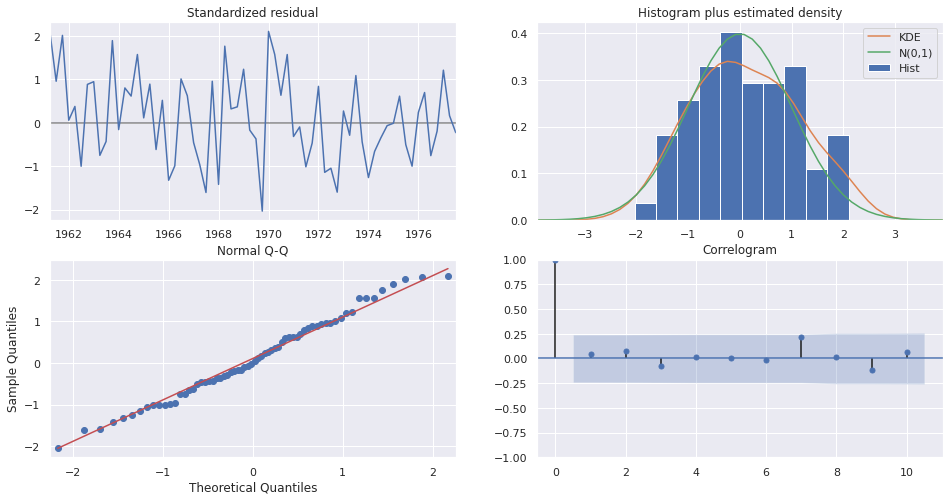

In [ ]:
model.plot_diagnostics(figsize=(16,8));
plt.show()

In [ ]:
# Predicciones del conjunto train
pred = model.get_prediction(step=1)

conficence_int = pred.conf_int()
predicted = pred.prediction_results
print(conficence_int)

            lower sales  upper sales
date                                
1960-01-01 -2771.807658  2771.807658
1960-04-01 -1960.306488  1959.621508
1960-07-01 -1960.426033  1959.501962
1960-10-01 -1960.126517  1959.801479
1961-01-01 -1386.896067  1384.911615
...                 ...          ...
1976-07-01     2.004115     2.361513
1976-10-01     1.761661     2.119059
1977-01-01     1.966547     2.323945
1977-04-01     2.134805     2.492203
1977-07-01     2.097530     2.454928

[71 rows x 2 columns]


In [ ]:
# Predicción del conjunto test 
n = len(X_test)
forec = model.get_forecast(n)

conficence_int = np.exp(forec.conf_int())
forecast = np.exp(forec.predicted_mean)
print(conficence_int)

            lower sales  upper sales
1977-10-01     6.547515     9.360358
1978-01-01     8.719680    12.732235
1978-04-01     9.517062    14.177778
1978-07-01     8.763374    13.306409
1978-10-01     6.759857    11.672693
1979-01-01     9.048520    16.211929
1979-04-01     9.715856    18.022149
1979-07-01     8.885698    17.032685
1979-10-01     6.751007    15.143154
1980-01-01     8.917896    21.111740
1980-04-01     9.530355    23.735787
1980-07-01     8.649782    22.603234
1980-10-01     6.597388    20.030549


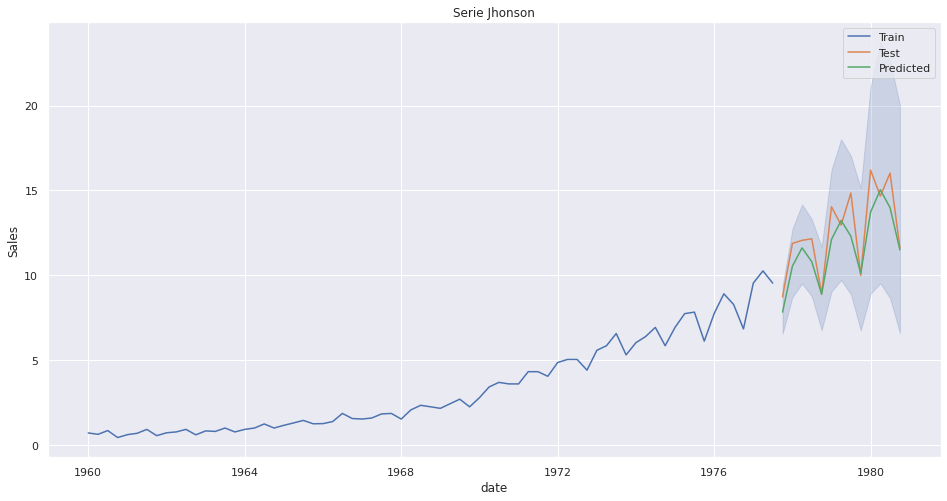

In [ ]:
# gráficamos serie de entrenamiento y serie de prueba
plt.figure(figsize=(16,8))
plt.plot(X_train, label='Train')
plt.plot(X_test, label = 'Test')
plt.plot(forecast, label = 'Predicted')
plt.fill_between(forecast.index, conficence_int.iloc[:, 0], conficence_int.iloc[:, 1], color='b', alpha=.2)
plt.title('Serie Jhonson')
plt.xlabel('date')
plt.ylabel('Sales')
plt.legend()
#mplcyberpunk.add_glow_effects()
plt.show()

## **Métricas de error**

Para obtener la métricas de error, empleamos la siguiente función:

In [ ]:
# obtenemos los residuos del modelo
residuals = model.resid

In [ ]:
# función para obtener las métricas de error
def metrics_eval(model):
  residuals = model.resid
  aic = model.aic
  bic = model.bic
  mse = np.mean(residuals**2)
  rmse = np.sqrt(mse)
  mae = np.mean(np.abs(residuals))
  result = {'Metric': ['AIC', 'BIC', 'MSE', 'RMSE', 'MAE'], 'Values': [aic, bic, mse, rmse, mae]}
  return pd.DataFrame(result)


In [ ]:
metrics = metrics_eval(model)
metrics

,Metric,Values
0,AIC,-121.581832
1,BIC,-115.012868
2,MSE,0.020905
3,RMSE,0.144585
4,MAE,0.098419


# **Predicción de valores futuros (Forecasting)**

In [ ]:
model = SARIMAX(np.log(yt), order=(0,1,1), seasonal_order=(1,1, 0, 4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             sales   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 4)   Log Likelihood                  78.457
Date:                           Wed, 13 Jul 2022   AIC                           -150.914
Time:                                   00:22:11   BIC                           -143.805
Sample:                               01-01-1960   HQIC                          -148.066
                                    - 10-01-1980                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6795      0.096     -7.106      0.000      -0.867      -0.492
ar.S.L4       -0.3219      0.108     -2.971      0.003      -0.534      -0.110
sigma2         0.0079      0.002      5.152      0.000       0.005       0.011
===================================================================================
Ljung-Box (Q):                       36.29   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.64   Prob(JB):                         0.45
Heteroskedasticity (H):               0.45   Skew:                             0.08
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Forecast h period ahead
n = 10
forec = model.get_forecast(n)

conficence_int = np.exp(forec.conf_int()) # intervalos de confianza
forecast = np.exp(forec.predicted_mean) # predicción
print(conficence_int)

            lower sales  upper sales
1981-01-01    15.424165    21.858001
1981-04-01    13.931679    20.090788
1981-07-01    15.322880    22.468440
1981-10-01    10.755602    16.025217
1982-01-01    16.063933    27.273200
1982-04-01    14.374298    25.203734
1982-07-01    15.622910    28.240583
1982-10-01    10.979488    20.430489
1983-01-01    16.183093    35.050550
1983-04-01    14.380562    32.658727


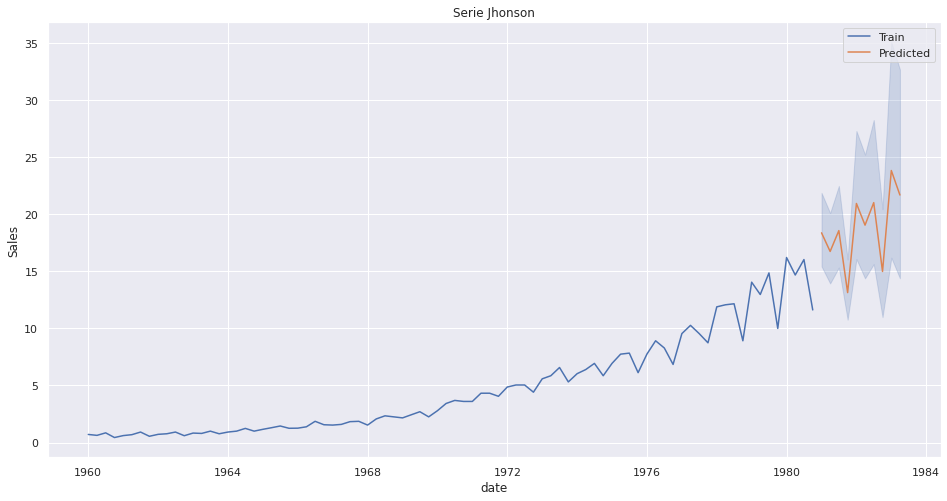

In [ ]:
# gráficamos serie de entrenamiento y serie de prueba
plt.figure(figsize=(16,8))
plt.plot(yt, label='Train')
plt.plot(forecast, label = 'Predicted')
plt.fill_between(forecast.index, conficence_int.iloc[:, 0], conficence_int.iloc[:, 1], color='b', alpha=.2)
plt.title('Serie Jhonson')
plt.xlabel('date')
plt.ylabel('Sales')
plt.legend()
#mplcyberpunk.add_glow_effects()
plt.show()

# Auto ARIMA

In [ ]:
!pip install pmdarima
#!pip install pyramid
!pip install pyramid-arima

In [ ]:
import pmdarima as pm

In [ ]:
model = pm.auto_arima(np.log(yt), start_p=1, start_q=1,
                      test='adf',       #adftest para encontrar el valor óptimo de 'd'
                      max_p=3, max_q=3, # máx p y q
                      m=4,              # frecuencia de la serie
                      d=1,              # diferenciación de la parte regular (no estacional)
                      seasonal=True,    # 
                      start_P=0, start_Q=0,  # valores de inicip de P y Q de la parte estacional 
                      D=1,                   # Diferenciación de la parte estacional 
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=-148.771, Time=0.25 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=-124.069, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=-146.032, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=-150.753, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=-145.514, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=-149.132, Time=0.25 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=-149.308, Time=0.20 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=-150.914, Time=0.12 sec
 ARIMA(0,1,1)(2,1,0)[4]             : AIC=-149.252, Time=0.19 sec
 ARIMA(0,1,1)(2,1,1)[4]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=-125.920, Time=0.09 sec
 ARIMA(1,1,1)(1,1,0)[4]             : AIC=-148.918, Time=0.19 sec
 ARIMA(0,1,2)(1,1,0)[4]             : AIC=-148.916, Time=0.18 sec
 ARIMA(1,1,2)(1,1,0)[4]             : AIC=-148.355, Time=0.37 sec
 ARIMA(0,1,1)(1,1,0)[4] intercept   : 

Observamos que el método $auto\_arima()$ nos lleva a la solución óptima: